## Исследование деловой активности интернет-магазина "Стримчик"

**В нашем распоряжении таблица с данными о видеоиграх для различных игровых платформ из открытых источников. Наша задача - выявить закономерности, влияющие на успешность игр, чтобы помочь компании спланировать свою коммерческую активность на следующий год.**

**Вот некоторые из интересующих нас вопросов:**
- Есть ли различия в популярности в зависимости от платформы и жанра? 
- Как влияют на продажи рейтинги, пользовательские оценки и оценки критиков? 
- Какова динамика изменений различных показателей за представленный период?

### Первичное знакомство с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
try:
    df = pd.read_csv('/home/renat/Downloads/games.csv')
except:
    df = pd.read_csv(r'/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Обозначим найденные проблемы:**
- названия столбцов нужно привести к нижнему регистру
- по 2 пропуска в name и genre
- для удобства стоит поменять тип данных year_of_release
- большое количество пропусков в critic_score, user_score, rating

**Также проверим таблицу на наличие дубликатов**

## Предобработка

**Подготовьте данные:**

- Замените названия столбцов (приведите к нижнему регистру);

- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

- Обработайте пропуски при необходимости:

- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [5]:
df[df.duplicated()] #проверим наличие явных дубликатов

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


In [6]:
df = df.rename(str.lower, axis='columns') #приведем названия столбцов к нижнему регистру

**Посмотрим на строки с пропусками в Genre и Name**

In [7]:
df[df['genre'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
df = df.loc[~df['name'].isnull()] 
#удалим 2 строки с пропусками в name и genre удалим из датасета
#заменить пропуски нечем, а 2 строки не несут большой ценности для анализа

In [9]:
df['year_of_release'] = df['year_of_release'].fillna(0).astype('int') 
#Тип данных в year_of_release поменяем на int, заполнив пропуски нулем

In [10]:
#df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] 
df['sum_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
#Добавим столбец с общим количеством продаж

***Беспокоит большое количество пропусков в critic_score, user_score и rating, для двух последних еще неплохо поменять тип данных. Изучим эти аномалии поподробнее***

### Что с user score?

In [11]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**В user score имеется значение tbd - это аббревиатура to be determined. По сути, это то же значение NaN - данных о рейтинге просто нет. Причины могут быть разными - проверим связь значений tbd со значениями в других столбцах. Сделаем срез и посмотрим, есть ли у этих игр что-то общее - а потом будем решать, что делать с пропусками**

In [12]:
df.query('user_score == "tbd"').sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
5370,Super Bust-A-Move,PS2,2000,Puzzle,0.17,0.13,0.0,0.04,75.0,tbd,E,0.34
9605,Drome Racers,PS2,2002,Racing,0.06,0.05,0.0,0.02,57.0,tbd,E,0.13
16226,UEFA Champions League 2006-2007,PSP,2007,Sports,0.01,0.00,0.0,0.00,71.0,tbd,E,0.01
6700,The Backyardigans,DS,2009,Adventure,0.23,0.00,0.0,0.02,NaN,tbd,E,0.25
9625,Shimano Xtreme Fishing,Wii,2009,Sports,0.12,0.00,0.0,0.01,NaN,tbd,T,0.13
13908,Outlaw Volleyball Remixed,PS2,2004,Sports,0.02,0.01,0.0,0.00,57.0,tbd,M,0.03
16346,Lumo,PSV,2016,Puzzle,0.00,0.01,0.0,0.00,NaN,tbd,E10+,0.01
9744,Rock Band Track Pack Volume 2,PS2,2008,Misc,0.06,0.05,0.0,0.02,NaN,tbd,T,0.13
8950,Jurassic: The Hunted,Wii,2009,Shooter,0.14,0.00,0.0,0.01,NaN,tbd,T,0.15
11377,Face Racers: Photo Finish,3DS,0,Racing,0.08,0.00,0.0,0.01,NaN,tbd,E,0.09


In [13]:
df.query('user_score == "tbd"').sort_values(by='sum_sales', ascending=False).head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E,2.24
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+,2.22
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E,2.06
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E,1.94
1048,Imagine: Teacher,DS,2008,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E,1.71


**Взял несколько сэмплов из этого среза - встречаются различные платформы, годы выпуска, рейтинги, т.е очевидной связи нет. Можно отметить, что цифры продаж для этих игр довольно скромные. Отсортировал срез по количеству продаж и погуглил лидеров - Zumba Fitness и Namco Museum. На Метакритике у них если и есть пользовательский рейтинг, то на основе буквально нескольких оценок**

**Делаю вывод, что игры с tbd в user score либо малопопулярны, либо их аудитория - не те люди, которые оставляют отзывы на Метакритике**

**Чтобы привести тип данных к float, эти tbd заменим на NaN**

In [14]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype('float')


### А что с пропусками в critic_score?

In [15]:
df.loc[(df['critic_score'].isna() == True) & (df['user_score'].isna() == True)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [16]:
len(df.loc[df['critic_score'].isna() == True])

8576

In [17]:
df.loc[(df['critic_score'].isna() == True) & (df['user_score'].isna() == False)].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M,4.36
263,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M,4.28
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
291,World Soccer Winning Eleven 9,PS2,2005,Sports,0.12,2.26,0.90,0.77,NaN,8.2,E,4.05
359,Just Dance 2014,Wii,2013,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+,3.58


**Пропусков 8576 - при этом в 8003 случаях в той же строке пропуск и в user_score. Связи с остальными столбцами снова не прослеживается. Можно предположить, что пропуски также связаны с непопулярностью. Но что бросается в глаза - есть игры, у которых нет оценки критиков, но есть пользовательский рейтинг. И это игры популярных серий, такие как CoD Advanced Warfare и FIFA 15, а точнее - их версии для PS3 и Xbox360. У версий этих же игр, вышедших на консолях следующего поколения, присутствуют и оценки критиков, и пользователей.**

**Моя версия такова - критики пишут свои отзывы на версии игр для наиболее актуального поколения консолей, эта гипотеза подтверждается для Playstation, Xbox, Nintendo. Остальные платформы не слишком популярны, поэтому отзывов критиков может и не быть (исключение здесь ПК, но тут есть нюанс - все игры на ПК, у которых нет отзывов, очень древние - конца 90-х годов)**

**В конечном итоге эти пропуски нам заменить нечем - поэтому оставим их как есть**

### Столбец Rating

In [18]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Стоит обратить внимание на эти рейтинги. Немного погуглив, обнаружим, что К-А (Kids to Adults) - это устаревшее название категории E (Everyone). А рейтинг RP (Rating Pending) означает, продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.**

In [19]:
df['rating'] = df['rating'].replace('K-A', 'E') #заменим K-A на E

In [20]:
#len(df[df['rating'].isnull() == True]) / len(df) 
df['rating'].isnull().mean()
#найдем процент пропусков

0.40471489259857596

**Пропусков очень много - целых 40%**

**ESRB была основана в 1994 году - но это не значит, что вышедшие до этого игры не имеют рейтинга. При проверке оказывается, что ретроактивно рейтинг был присвоен лишь 4 играм - это незначительно. А что насчет игр, вышедших после 1994?**

In [21]:
df[(df['year_of_release'] < 1994) & (df['year_of_release'] > 0) & (df['rating'].isnull() == False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
2612,The 7th Guest,PC,1992,Adventure,0.02,0.77,0.0,0.00,NaN,NaN,T,0.79
14470,Alter Ego,PC,1985,Simulation,0.00,0.03,0.0,0.01,59.0,5.8,T,0.04
14610,Doom,PC,1992,Shooter,0.02,0.00,0.0,0.00,85.0,8.2,M,0.02
14621,SimCity,PC,1988,Simulation,0.00,0.02,0.0,0.01,64.0,2.2,E10+,0.03


In [22]:
df[(df['rating'].isnull() == True) & (df['year_of_release'] > 1994)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,23.09
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,18.24
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,NaN,NaN,NaN,15.84
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


**Без рейтинга остались 6195 игр, вышедших после 1994**

In [23]:
print(df[(df['rating'].isnull() == True) & (df['year_of_release'] > 1994)] \
['critic_score'].count())

print(df[(df['rating'].isnull() == True) & (df['year_of_release'] > 1994)] \
['user_score'].count())

81
83


**В этой группе представлены игры различных жанров для различных платформ - но почти все они не имеют ни пользовательского рейтинга, ни рейтинга критиков. Возможные причины: 1)низкая популярность игр; 2)игры, ориентированные на японскую аудиторию - возможно, эти пользователи не склонны пользоваться тем же Metacritic.**

**Но в глаза бросаются некоторые аномалии - это популярные игры, такие как CoD Black Ops 3 - возможно, в этом случае  отсутствие рейтинга вызвано ошибкой в выгрузке данных**

In [24]:
df[df['rating'].isnull()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
4756,Disney's Hercules / Disney's The Jungle Book: ...,PS,2003,Misc,0.23,0.15,0.00,0.03,NaN,NaN,NaN,0.41
1797,Ratchet & Clank: All 4 One,PS3,2011,Platform,0.75,0.21,0.05,0.12,NaN,NaN,NaN,1.13
14588,Who Wants to be a Millionaire: 1st Edition,Wii,2007,Misc,0.00,0.03,0.00,0.00,NaN,NaN,NaN,0.03
16619,Knights in the Nightmare: DHE Series Special Pack,DS,2008,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
6625,Cartoon Network Collection: Game Boy Advance V...,GBA,2004,Misc,0.18,0.07,0.00,0.00,NaN,NaN,NaN,0.25
12100,Tom and Jerry in War of the Whiskers,GC,2003,Fighting,0.05,0.01,0.00,0.00,NaN,NaN,NaN,0.06
13584,M&M's Beach Party,Wii,2009,Misc,0.04,0.00,0.00,0.00,NaN,NaN,NaN,0.04
3821,Littlest Pet Shop 3: Biggest Stars - Blue / Pi...,DS,2010,Simulation,0.49,0.00,0.00,0.03,NaN,NaN,NaN,0.52
6004,Top Gear Overdrive,N64,1998,Racing,0.23,0.06,0.00,0.00,NaN,NaN,NaN,0.29
15094,Puppet Show 3: Lost Town,PC,2011,Puzzle,0.00,0.02,0.00,0.00,NaN,NaN,NaN,0.02


## EDA

**Проведите исследовательский анализ данных:**

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующийактуальный период.Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные запредыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по- платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы- отзывы пользователей и критиков. Постройте диаграмму рассеяния и- посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

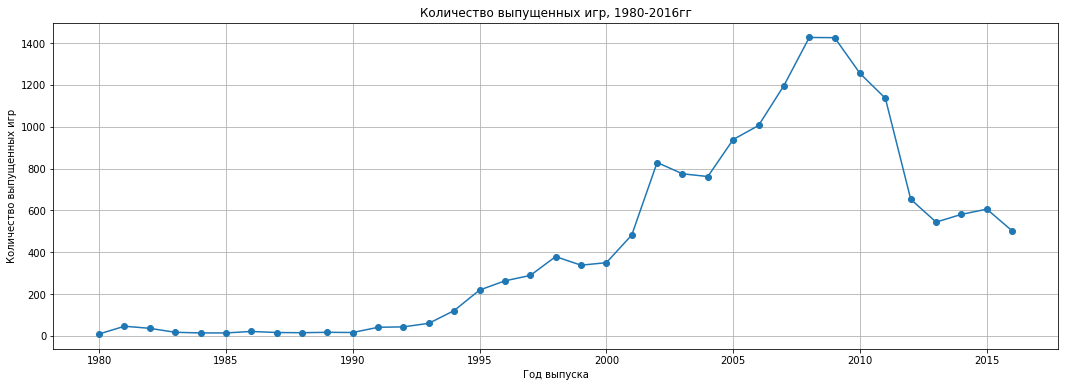

In [25]:
df.query('year_of_release != 0').pivot_table(index='year_of_release', values='name', aggfunc='count') \
.plot(style='o-', figsize=(18,6), grid=True, xlabel='Год выпуска' \
      ,ylabel='Количество выпущенных игр', legend=False, title='Количество выпущенных игр, 1980-2016гг')
plt.show()

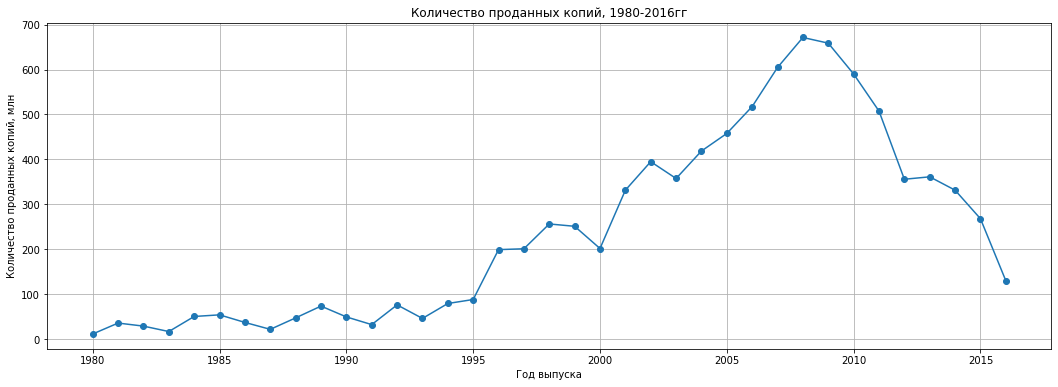

In [26]:
df.query('year_of_release != 0').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum') \
.plot(style='o-', figsize=(18,6), grid=True, xlabel='Год выпуска', ylabel='Количество проданных копий, млн' \
      ,legend=False, title='Количество проданных копий, 1980-2016гг')
plt.show()

**Эти графики во многом представляют из себя визуальную репрезентацию истории игровой индустрии, с ее взлетами и падениями, важными вехами в развитии, периодом бурного роста, расцвета, а затем неуклонного падения. Важными толчками к развитию стали:**
- выход на рынок в 1994 году PS1 , которая пошатнула баланс сил между Nintendo и Sega
- выход на рынок в 2000 PS2, которая до сих пор остается самой продаваемой в истории (более 155млн копий)
- выпуск PS3, Xbox360 и Wii в течение 2005-2006 годов
- выпуск на ПК сверхпопулярных Counter-Strike, Doom, World of Warcraft (однако на продажи это оказало мало влияния в силу пиратства)

**С начала 2010-х можно наблюдать неуклонный спад количества выпускаемых игр и продаж. Связать его можно в первую очередь с развитием игр для мобильных платформ. Также немаловажную роль, на мой взгляд, играет возрастающая сложность разработки - требования к играм повысились, и повысилось требуемое на разработку количество человеческих и временных ресурсов**

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

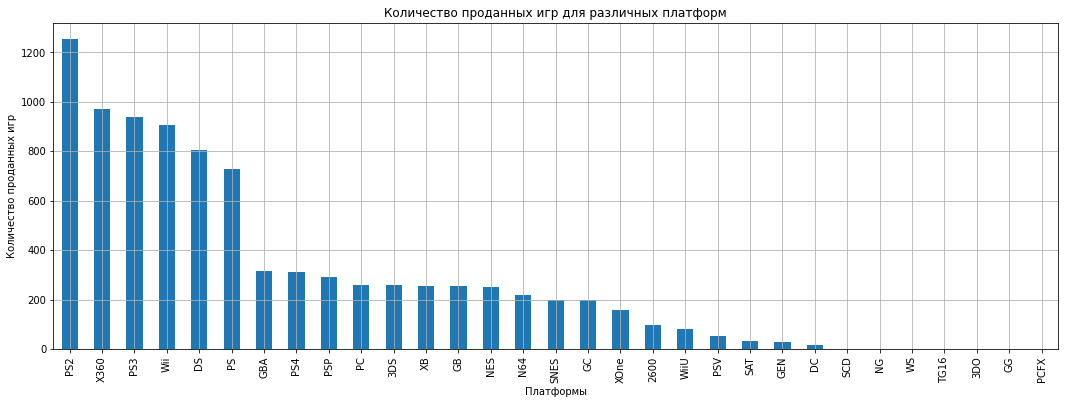

In [27]:
df.pivot_table(index='platform', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False) \
.plot(xlabel='Платформы', ylabel='Количество проданных игр', kind='bar', figsize=(18,6), grid=True, legend=False \
     , title='Количество проданных игр для различных платформ')
plt.show()

**Наибольшие суммарные продажи показали игры для 6 платформ - это PS1,2 и 3; Xbox360, Nintendo DS и Wii.** 

In [28]:
#Функция для составления сводных таблиц для подсчета проданных игр по годам для различных платформ
def platform_performance(data, platform):
    result = data.loc[(data['platform'] == platform) & (data['year_of_release'] > 1990)].pivot_table \
(index='year_of_release', values='sum_sales', aggfunc='sum')
    
    return result
#Условие year_of_release > 1990 указал по причине, что в данных обнаружилась аномалия - игра Strongest
#Tokyo University, вышедшая в 1985, указана для платформы DS - однако DS вышла в 2004

In [29]:
top_6 = df.pivot_table(index='platform', values='sum_sales', aggfunc='sum') \
.sort_values(by='sum_sales', ascending=False).head(6).index #список с названиями топ-платформ

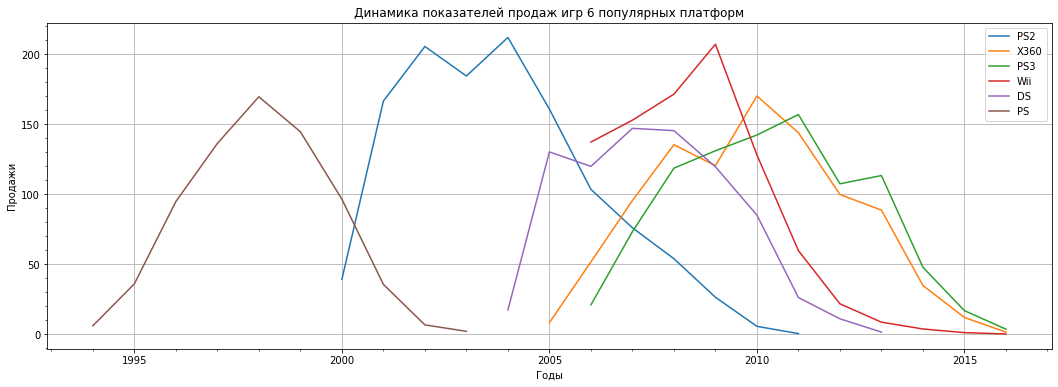

In [30]:
plt.figure(figsize=(18,6))
plt.title('Динамика показателей продаж игр 6 популярных платформ')
plt.ylabel('Продажи')
plt.xlabel('Годы')
plt.grid(visible=True)
plt.minorticks_on()
for i in top_6:
    sns.lineplot(data=platform_performance(df, i)['sum_sales'], label=i)

**Жизненный цикл приставок колеблется от 9 до 11 лет. Пик популярности приходится на 4-5 год существования, затем количество проданных игр постепенно падает (исключение - Wii, пик которой пришелся на 3 год существования, после чего последовал резкий спад)**

### Возьмите данные за соответствующий актуальный период.Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

**Взглянув на динамику продаж для 6 топовых платформ мы заметим, что к настоящему времени их показатели находятся на низких уровнях. А вышедшие в конце 2013 года и наиболее актуальные PS4 и XOne на нем не отражены. Их общее количество продаж пока не так высоко - но именно на них стоит ориентироваться, планируя коммерческую деятельность на следующий год. В качестве актуального периода возьмем данные с 2013 года - таким образом мы охватим как информацию об актуальных приставках, так и о стремительно сокращающейся, но все еще важной доле приставок прошлого поколения**

In [31]:
new_df = df.query('year_of_release >=2013')

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

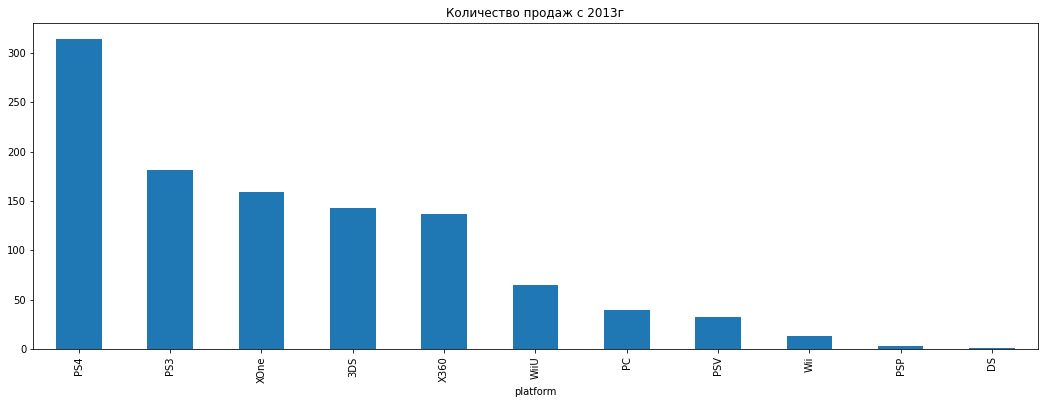

In [32]:
new_df.pivot_table(index='platform', values='sum_sales', aggfunc='sum') \
.sort_values(by='sum_sales', ascending=False).plot(kind='bar', figsize=(18,6), title='Количество продаж с 2013г' \
                                                  , legend=False)
plt.show()

In [33]:
games_2013 = df.query('year_of_release >=2013')['platform'].value_counts().index

In [34]:
#Функция для составления сводных таблиц для подсчета проданных игр по годам для различных платформ
def platform_performance_2(data, platform):
    result = data.loc[(data['platform'] == platform) & (data['year_of_release'] >= 2013)].pivot_table \
(index='year_of_release', values='sum_sales', aggfunc='sum')
    
    return result

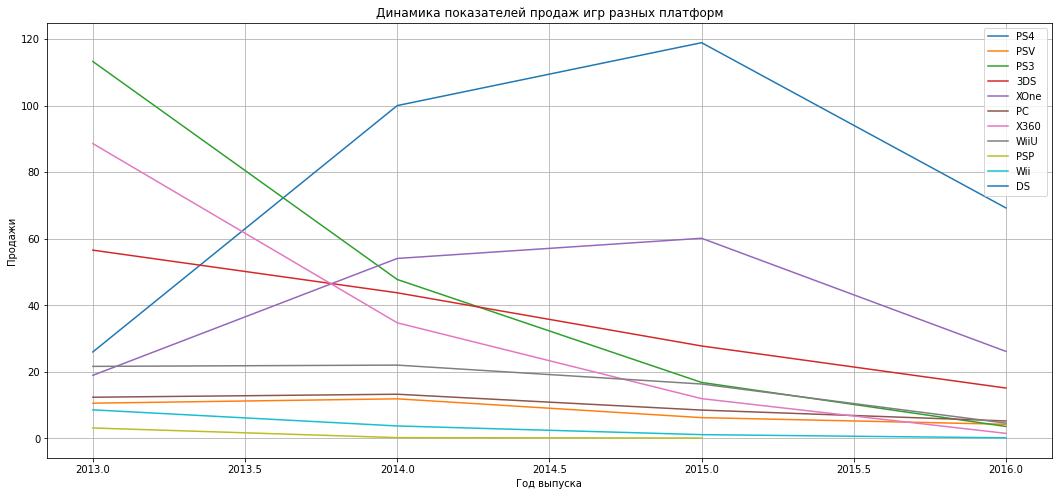

In [35]:
plt.figure(figsize=(18,8))
plt.title('Динамика показателей продаж игр разных платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.grid(visible=True)
for i in games_2013:
    sns.lineplot(data=platform_performance_2(new_df, i)['sum_sales'], label=i)

**Самыми популярными платформами на данный момент являются PS4, XboxOne и 3DS**

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

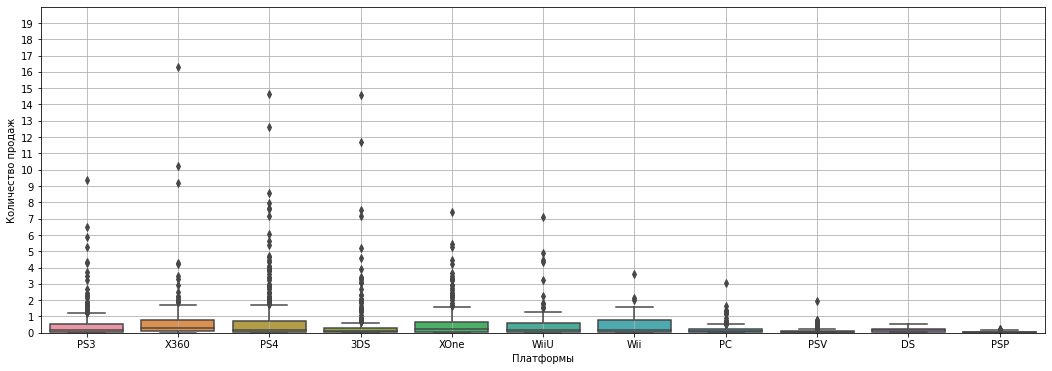

In [36]:
plt.figure(figsize=(18,6))
plt.ylim([0, 20])
sns.boxplot(data=new_df.query('platform in @games_2013'), x='platform', y='sum_sales')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.yticks(np.arange(0.0, 20.0, 1))
plt.grid(visible=True)
plt.show()


**Глядя на график можно сделать вывод, что успех игровой платформы определяется скорее не средними показателями продаж, а сверхпопулярными играми, завоевавшими широкое признание. Во многом этим обусловлено желание компаний-производителей консолей заключать эксклюзивные контракты со студиями-разработчиками**

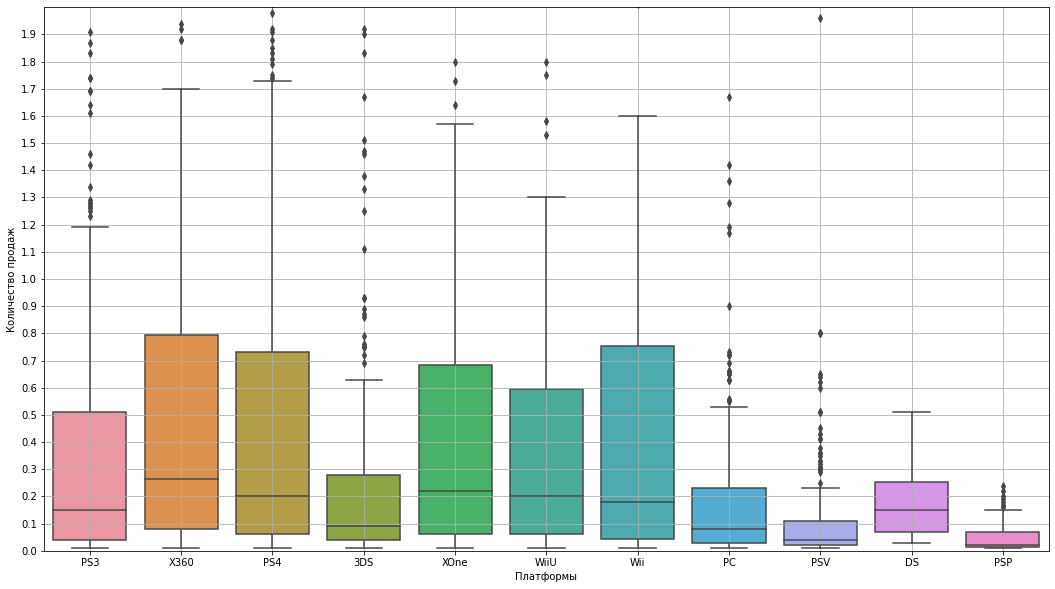

In [37]:
plt.figure(figsize=(18,10))
plt.ylim([0, 2])
sns.boxplot(data=new_df.query('platform in @games_2013'), x='platform', y='sum_sales')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.yticks(np.arange(0.0, 2.0, 0.1))
plt.grid(visible=True)
plt.show()

**При оценке же средних показателей артина следующая:**
- PS4 показывает очень внушительные результаты - медиана продаж довольно высока (200т.), межквартильный размах от 70 до 730 тысяч продаж, а верхний ус превышает 1.7 млн. При этом много выбросов - сверхпопулярных игр. У PS3 аналогичные показатели несколько скромнее - медиана 150т, верхний ус - 1.2млн, межквартильный размах 50 - 500тысяч.
- Наибольшую медиану продаж показывают приставки Xbox - однако "выстреливших" игр для них несколько меньше. Большая часть наблюдений в диапазоне 100-800 тысяч (XBOX360) и 70-700 тысяч (XOne).
- А вот у Wii и WiiU не могут похвастаться большим количеством хитовых игр, но и доля малоуспешных игр у них мала. На этих платформах игр выпускается гораздо меньше, и конкуренция между ними также меньше. Кроме того, на такое распределение повлияло изначальное позиционирование приставки, стремление занять новую нишу на рынке и особые "фичи"
- Отдельного упоминания стоит 3DS, средние показатели продаж которой не столь впечатляющи (межквартильный размах 50-280 тысяч), однако количество хитов с миллионными продажами велико.

### Посмотрите, как влияют на продажи внутри одной популярной платформы- отзывы пользователей и критиков. Постройте диаграмму рассеяния и- посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

**В качестве платформы возьмем PS3**

In [38]:
ps3 = new_df.query('platform =="PS3"')

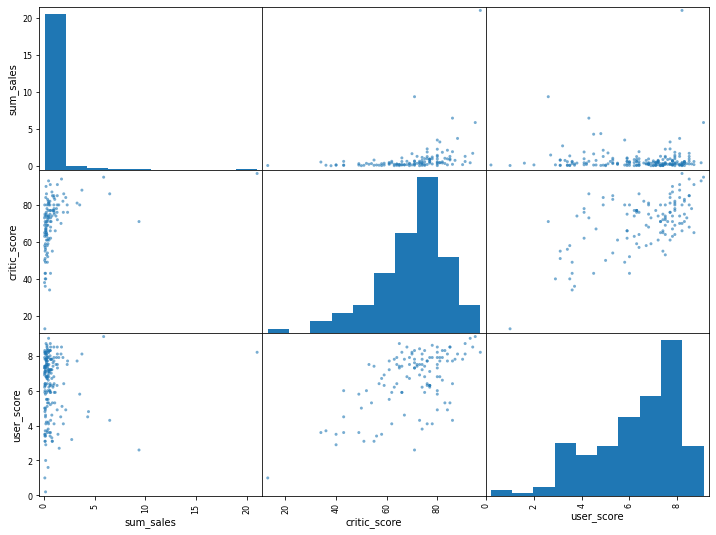

In [39]:
pd.plotting.scatter_matrix(ps3[['sum_sales', 'critic_score', 'user_score']], figsize=(12,9), alpha=0.6)
plt.show()

In [40]:
ps3[['sum_sales', 'critic_score', 'user_score']].corr()

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


**Коэффициент корелляции между количеством продаж и отзывами критиков составляет 0.33 - связь довольно слабая**

**Между оценками пользователей и количеством продаж подобной связи не наблюдается**

### Соотнесите выводы с продажами игр на других платформах.

**PS4**

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


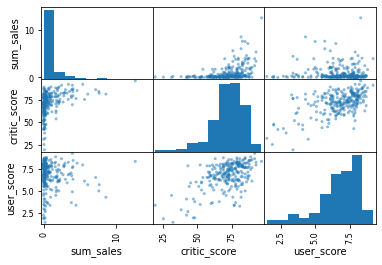

In [41]:
ps4=new_df.query('platform == "PS4"')
pd.plotting.scatter_matrix(ps4[['sum_sales', 'critic_score', 'user_score']])
ps4[['sum_sales', 'critic_score', 'user_score']].corr()

**XBOX360**

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


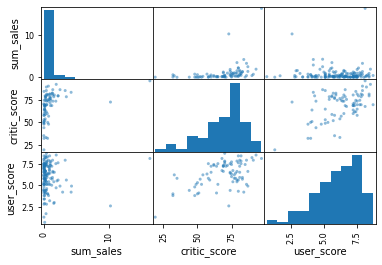

In [42]:
x360 = new_df.query('platform == "X360"')
pd.plotting.scatter_matrix(x360[['sum_sales', 'critic_score', 'user_score']])
x360[['sum_sales', 'critic_score', 'user_score']].corr()

**XOne**

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


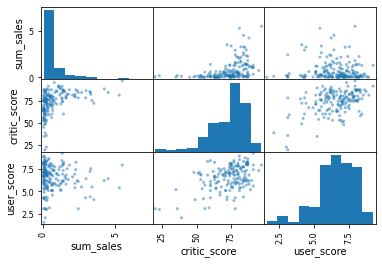

In [43]:
xone = new_df.query('platform == "XOne"')
pd.plotting.scatter_matrix(xone[['sum_sales', 'critic_score', 'user_score']])
xone[['sum_sales', 'critic_score', 'user_score']].corr()

**3DS**

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


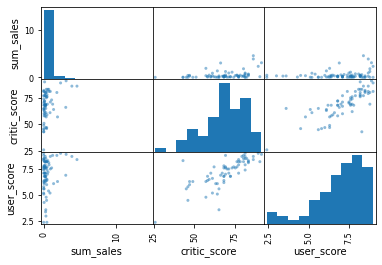

In [44]:
ds_3 = new_df.query('platform == "3DS"')
pd.plotting.scatter_matrix(ds_3[['sum_sales', 'critic_score', 'user_score']])
ds_3[['sum_sales', 'critic_score', 'user_score']].corr()

**Влияние пользовательские оценок и оценок критиков на количество продаж от платформы к платформе отличается очень незначительно. Прослеживается небольшое влияние оценок критиков на цену, а пользовательские рейтинги на нее практически не влияют**

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### **Количество выпущенных игр разных жанров**

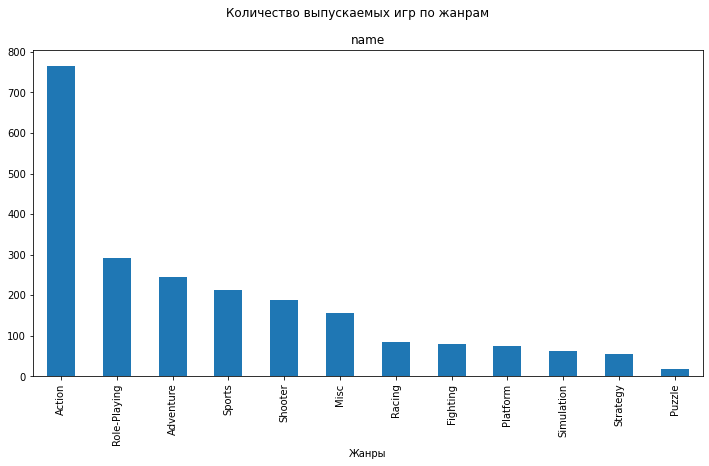

In [45]:
new_df.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False). \
plot(kind='bar', subplots=True, xlabel='Жанры', legend=False, figsize=(12,6), \
     title='Количество выпускаемых игр по жанрам')
plt.show()

**С большим отрывом лидирует жанр Action, за ними расположились ролевые и приключенческие игры**

#### **Количество проданных копий игр разных жанров**

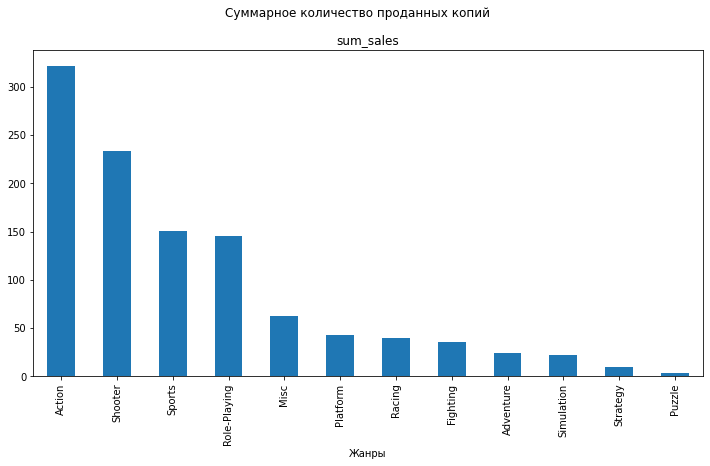

In [46]:
new_df.pivot_table(index='genre', values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False). \
plot(kind='bar', subplots=True, xlabel='Жанры', legend=False, figsize=(12,6), title='Суммарное количество проданных копий')
plt.show()

**В рейтинге продаж картина отличается. Лидер все так же Action, за которым идут шутеры. Спортивные симуляторы и ролевые игры занимают 3 и четвертое место с незначительным разрывом**

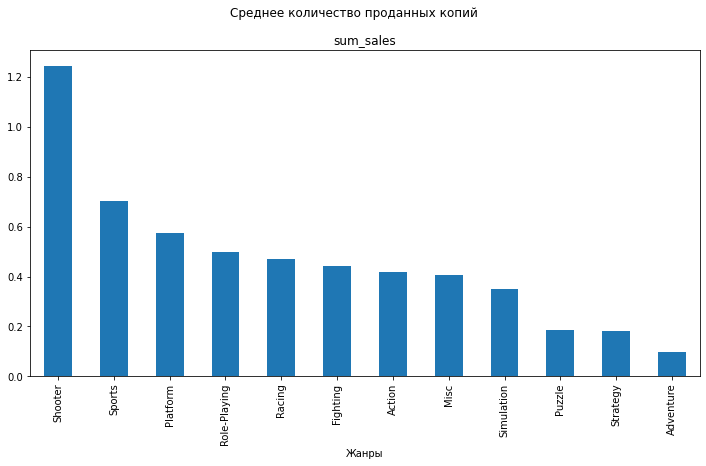

In [47]:
new_df.pivot_table(index='genre', values='sum_sales', aggfunc='mean').sort_values(by='sum_sales', ascending=False). \
plot(kind='bar', subplots=True, xlabel='Жанры', legend=False, figsize=(12,6), title='Среднее количество проданных копий')
plt.show()

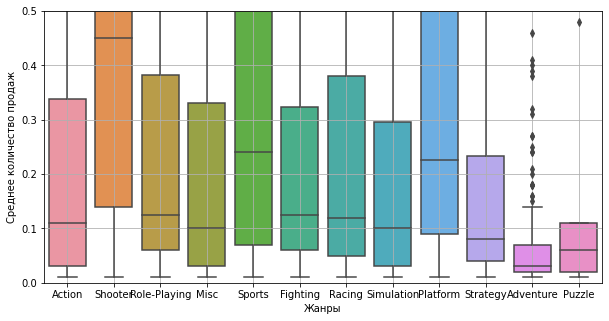

In [48]:
plt.figure(figsize=(10,5))
plt.ylim([0,0.5])
sns.boxplot(data=new_df, x='genre', y='sum_sales')
plt.xlabel('Жанры')
plt.ylabel('Среднее количество продаж')
plt.grid(visible=True)
plt.show()

При подсчете средних значений продаж картина действительно меняется. Игр жанра экшн (а они в основном однопользовательские) больше всего, и они показывают наибольшее суммарное количество продаж, медиана едва превышает 100 тысяч, а на боксплоте верхний ус не достигает даже миллиона копий. Среднее значение 400 тысяч - такая разница между медианой и средним вызвана большим количеством выбросов

Зато многопользовательские игры - шутеры, спортивные симуляторы, РПГ - выходят реже, но каждая продается в среднем большим количеством копий. Особенно это касается шутеров - в среднем более 1.2 миллиона копий, медиана 450 тысяч.

## Составьте портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):**
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5)

In [49]:
def platform_by_country(country_sales, ax):
    table = new_df.pivot_table(index='platform', values=country_sales, aggfunc='sum') \
        .sort_values(by=country_sales, ascending=False).head()
    plot = table.plot(kind='pie', subplots=True, grid=True, xlabel='Платформа', ax=axes[ax], autopct='%.2f', startangle=90)
    return plot

array([<AxesSubplot:ylabel='jp_sales'>], dtype=object)

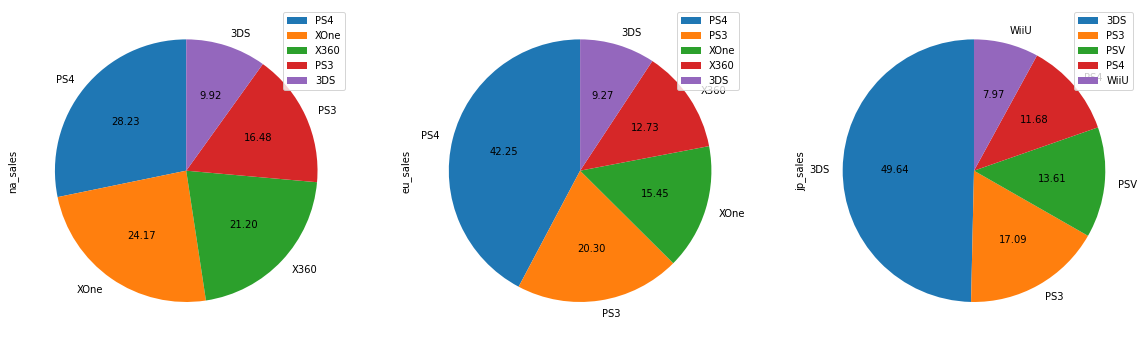

In [50]:
fig, axes = plt.subplots(1,3, figsize=[20,10])

platform_by_country('na_sales', 0)
platform_by_country('eu_sales', 1)
platform_by_country('jp_sales', 2)


**Заметна дифференциация по регионам продаж - в Северной Америке приставки от американской компании Microsoft пользуются большим успехом, чем в других регионах(но все равно уступают лидеру - PS4. В Японии единоличный лидер - 3DS(которая в Америке и Европе замыкает пятерку), за которым следуют PS3 и PSV(последняя входит в топ только в Японии - заметна любовь этой страны к портативным платформам). Структура потребления в Европе больше походит на Северную Америку - но с большей склонностью к приставкам от Sony.**

### Самые популярные жанры (топ-5)

In [51]:
def genre_by_country(country_sales, ax):
    table = new_df.pivot_table(index='genre', values=country_sales, aggfunc='sum') \
        .sort_values(by=country_sales, ascending=False).head()
    result = table.plot(kind='pie', subplots=True, ax=axes[ax], grid=True, xlabel='Жанр', autopct='%.2f', startangle=90)
    return result

array([<AxesSubplot:ylabel='jp_sales'>], dtype=object)

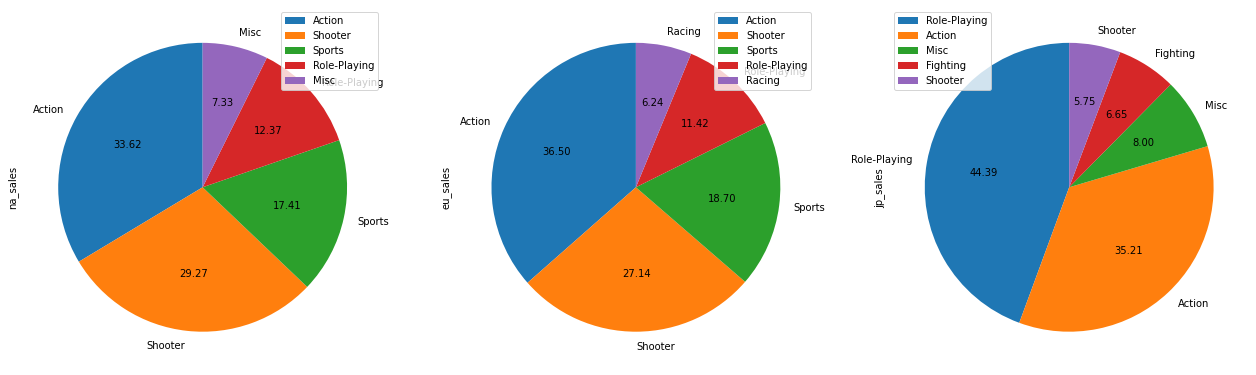

In [52]:
fig, axes = plt.subplots(1,3, figsize=[22, 10])

genre_by_country('na_sales', 0)
genre_by_country('eu_sales', 1)
genre_by_country('jp_sales', 2)

**Европейские и американские пользователи демонстрируют практически идентичные предпочтения - они любят Action, шутеры и спортивные симуляторы. А вот японские геймеры существенно отличаются во вкусах - здесь с большим отрывом лидируют ролевые игры, за ними идут экшены, остальные жанры сильно уступают в популярности**

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [53]:
def rating_by_country(country_sales, ax):
    table = new_df.pivot_table(index='rating', values=country_sales, aggfunc='sum') \
        .sort_values(by=country_sales, ascending=False).head()
    result = table.plot(kind='bar', grid=True, ax=axes[ax], xlabel='Рейтинг ESRB')
    return result

<AxesSubplot:xlabel='Рейтинг ESRB'>

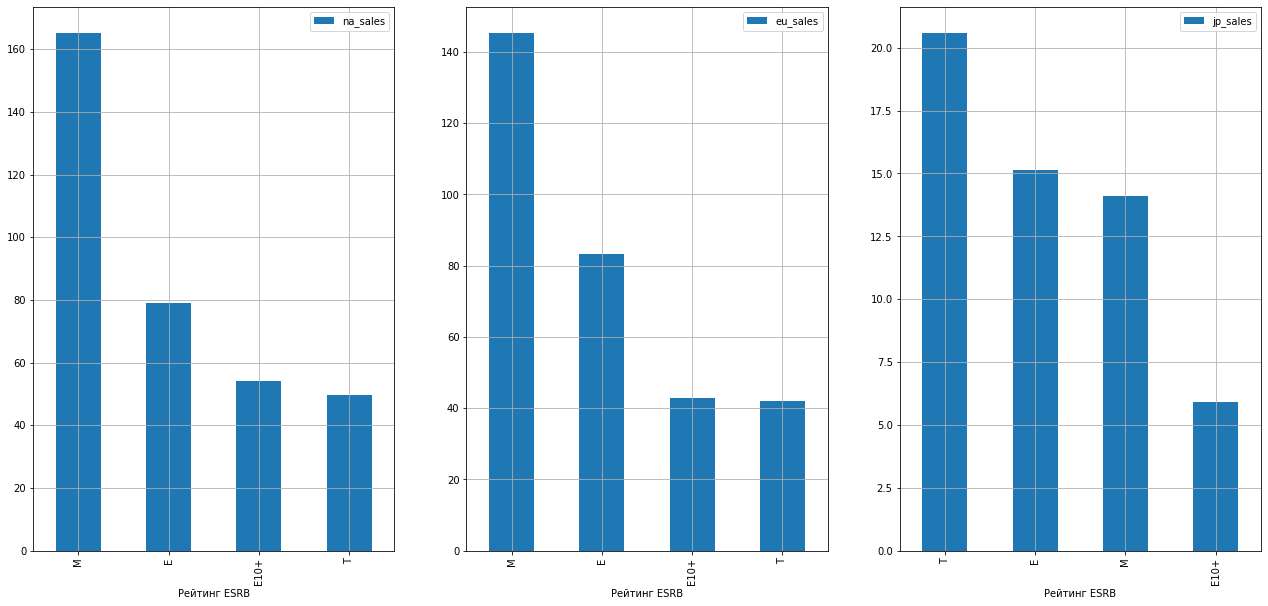

In [54]:
fig, axes = plt.subplots(1,3, figsize=[22, 10])

rating_by_country('na_sales', 0)
rating_by_country('eu_sales', 1)
rating_by_country('jp_sales', 2)

**Сходства между американцами и европейцами снова дают о себе знать - мы видим практически идентичные графики с очевидным лидерством игр категории "Для взрослых"**

**А вот в Японии гораздо более популярны игры для подростков, игры для взрослых лишь на 3 месте**

## Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ.«действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

**Поясните:**
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему

### Средние пользовательские рейтинги XOne & PC

**Нулевая гипотеза: средние пользовательские рейтинги одинаковые**

**Альтернативная гипотеза: средние пользовательские рейтинги отличаются**

In [55]:
xone_rating = new_df[new_df['platform'] == "XOne"]['user_score'].dropna()
pc_rating = new_df[new_df['platform'] == "PC"]['user_score'].dropna()
alpha = .05
result = st.ttest_ind(xone_rating, pc_rating, equal_var=False)
print('p-value=', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получилось')
        

p-value= 0.14759594013430463
Отвергнуть нулевую гипотезу не получилось


In [56]:
print('Средний пользовательский рейтинг Xone =', new_df[new_df['platform'] == "XOne"]['user_score'].mean())
print('Средний пользовательский рейтинг PC =', new_df[new_df['platform'] == "PC"]['user_score'].mean())
print('Стандартное отклонение для XOne =', np.std(new_df[new_df['platform'] == "XOne"]['user_score']))
print('Стандартное отклонение для PC =', np.std(new_df[new_df['platform'] == "PC"]['user_score']))
print('Дисперсия для XOne =', np.var(new_df[new_df['platform'] == "XOne"]['user_score']))
print('Дисперсия для PC =', np.var(new_df[new_df['platform'] == "PC"]['user_score']))

Средний пользовательский рейтинг Xone = 6.521428571428572
Средний пользовательский рейтинг PC = 6.269677419354839
Стандартное отклонение для XOne = 1.377141546212499
Стандартное отклонение для PC = 1.7367516654820372
Дисперсия для XOne = 1.8965188383045526
Дисперсия для PC = 3.01630634755463


**Нашу гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" подтвердить не удалось**

### Средние пользовательские рейтинги Action & Sports

**Нулевая гипотеза: средние пользовательские рейтинги одинаковые**

**Альтернативная гипотеза: средние пользовательские рейтинги отличаются**

In [57]:
action_rating = new_df[new_df['genre'] == "Action"]['user_score'].dropna()
sports_rating = new_df[new_df['genre'] == "Sports"]['user_score'].dropna()
alpha = .05
result = st.ttest_ind(action_rating, sports_rating, equal_var=False)
print('p-value=', result.pvalue)
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу не получилось')

p-value= 1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [58]:
print('Средний пользовательский рейтинг Action =', new_df[new_df['genre'] == "Action"]['user_score'].mean())
print('Средний пользовательский рейтинг Sports =', new_df[new_df['genre'] == "Sports"]['user_score'].mean())
print('Стандартное отклонение для Action =', np.std(new_df[new_df['genre'] == "Action"]['user_score']))
print('Стандартное отклонение для Sports =', np.std(new_df[new_df['genre'] == "Sports"]['user_score']))
print('Дисперсия для Action =', np.var(new_df[new_df['genre'] == "Action"]['user_score']))
print('Дисперсия для Sports =', np.var(new_df[new_df['genre'] == "Sports"]['user_score']))

Средний пользовательский рейтинг Action = 6.837532133676093
Средний пользовательский рейтинг Sports = 5.238124999999999
Стандартное отклонение для Action = 1.3284624265041283
Стандартное отклонение для Sports = 1.7778453207112817
Дисперсия для Action = 1.7648124186332366
Дисперсия для Sports = 3.160733984375


**Наша гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" подтвердилась**

## Общий вывод

Проанализировав динамику изменения количества выпускаемых игр и количества их продаж за последние 35 лет мы можем прийти к неутешительному выводу: игровая индустрия переживает период упадка с 2010 года. Падают как количество выпускаемых игр, так и продажи. Главная причина падения популярности - это развитие альтернативы в виде мобильных игр, которые вытесняют классические видеоигры. Кроме того, возрастающие требования к качеству игр подразумевают большие затраты на их разработку - как следствие, игры выходят реже.

В среднем жизненный цикл платформы составляет 10 лет, а пик популярности приходится на 4-5 год ее существования. Естественная смена поколений "железа" влечет за собой стимулы для гейм-девелоперов создавать игры для наиболее актуальных платформ.

В качестве актуального периода для рассмотрения мы взяли период с 2013 года, захватив таким образом период заката приставок прошлого поколения и начинающийся жизненный цикл новых PS4 и XOne.

Самыми популярными платформами являются PS4(единоличный лидер), PS3, XboxOne, Xbox360 и 3DS. При этом медианные продажи выше у приставок от Майкрософт, а вот у приставок от Сони и Нинтендо медиана ниже, зато сверхпопулярных игр больше.

Мы проанализировали влияние пользовательских оценок и оценок критиков на суммарные продажи. Выводы следующие:
- оценки пользователей не оказывают влияние на продажи
- оценки критиков влияние оказывают, но оно невелико

Среди самых популярных жанров преобладают шутеры, экшены, спортивные симуляторы и RPG

Интересны межрегиональные различия. В Северной Америке популярность американских приставок выше, чем в других регионах, однако все равно уступает гегемону в лице PS4. Для Японии характерна особенность - здесь популярны портативные платформы, лидер с большим отрывом - 3DS. 

Подобные различия прослеживаются и в популярности различных жанров - столь популярные в Европе и Америке шутеры в Японии замыкают топ-5, а вот ролевые игры на первом месте(в Америке и Европе - на четвертом). Игры жанра "экшн" пользуются популярностью во всех уголках мира.

Что касается рейтинга ESRB, между Европой и Северной Америкой здесь нет существенных различий, уверенное лидерство удерживают игры категории М (для взрослых). В Японии они уступают категории Т(подростки) и Е(для всех). Возможно, это связано с тем, что доля играющих взрослых в Японии меньше - то ли из-за культурных особенностей и деловой этики("негоже взрослым в игрушки играть, работать надо"), то ли из-за более строгого контроля(в Америке и Европе подростку игру для взрослых продадут, а в Японии нет).

Также мы проверили 2 гипотезы. 
- Гипотезу о равенстве средних пользовательских рейтингов игр для XOne и PC на нашей выборке не удалось опровергнуть - вероятность из неравенства слишком велика и составляет 14%
- Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports подтвердилась

